## Linear Regression

Assumption linear Regression: 
y = Mx+c
=> m = slope and c intercepts
(1.) Linear Regression in linear in parameter.

In [322]:
# labrary 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [323]:
# Load dataset
df = pd.read_csv(r"C:\Users\angaj\Downloads\day.csv")

In [324]:
# Data shape
df.shape

(730, 12)

In [325]:
# How many columns of datset
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [326]:
# Decribeing the columns of the data
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [327]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [328]:
# checking for the null values in columns data
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [329]:
# Get the info about cplumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [330]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [331]:
# Reanaming few columkns for better readbility.
df.rename(columns={"yr":"Year", "mnth":"months", "holiday":"Holi Day", "hum":"Humidity"}, inplace=True)

In [332]:
df.head()

,season,Year,months,Holi Day,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [333]:
# Again reanme
df.rename(columns={"months":"Month", "temp":"Temperature", }, inplace=True)

In [334]:
df.head()

,season,Year,Month,Holi Day,weekday,workingday,weathersit,Temperature,atemp,Humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [335]:
# copying the dataframe 
df_copy = df.copy()

In [336]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)
#df_copy2 = df_copy.drop_duplicates()

In [337]:
df_copy.shape

(730, 12)

In [338]:
df.columns

Index(['season', 'Year', 'Month', 'Holi Day', 'weekday', 'workingday',
       'weathersit', 'Temperature', 'atemp', 'Humidity', 'windspeed', 'cnt'],
      dtype='object')

In [339]:
# Encoding/maping the Seasion
df.season = df.season.map({1:"Spring", 2:"summer", 3:"Fall", 4:"Winter"})

In [340]:
df['season'][45]

'Spring'

In [341]:
# Encoding/maping the Month
df.Month = df.Month.map({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"june", 7:"july", 8:"aug", 9:"sit", 10:"oct", 11:"nov", 12:"Dec"})
df.Month

0      jan
1      jan
2      jan
3      jan
4      jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: Month, Length: 730, dtype: object

In [342]:
df['Month'][9]

'jan'

In [343]:
# Encoding/maping the Weekday
df.weekday = df.weekday.map({0:"sun", 1:"mon", 2:"tue", 3:"wed", 4:"thu", 5:"fri", 6:"sat"})

In [344]:
# Encoding/maping the wheatherlist columns
df.weathersit = df.weathersit.map({1:"clear", 2:"Misty", 3:"Light snowrain", 4:"Heavy snowrain"})

In [345]:
# Encoding/maping the woekingday columns:
# 0 => No work
# 1 => Yes work
#df.workingday = df.workingday.map({0:"No", 1:"Yes"})

In [346]:
# Year 
# 0 = 2018
# 1 = 2019
df.Year = df.Year.map({0:2018, 1:2019})

In [347]:
# finaly all columns encoding
df.head()

,season,Year,Month,Holi Day,weekday,workingday,weathersit,Temperature,atemp,Humidity,windspeed,cnt
0,Spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [348]:
# check the columns dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   Year         730 non-null    int64  
 2   Month        730 non-null    object 
 3   Holi Day     730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   Temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   Humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [349]:
df['Holi Day'][100]

0

In [350]:
# check the columns info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   Year         730 non-null    int64  
 2   Month        730 non-null    object 
 3   Holi Day     730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   Temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   Humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [351]:
# ploting visualization for columns
# by using function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x = column, y = "cnt", data=df, color="yellow")
    plt.subplot(1, 2, 2)
    sns.barplot(x = column, y = "cnt", data=df, hue='Year', palette="Set1")
    plt.legend(labels=['2018', "2019"])
    plt.show()

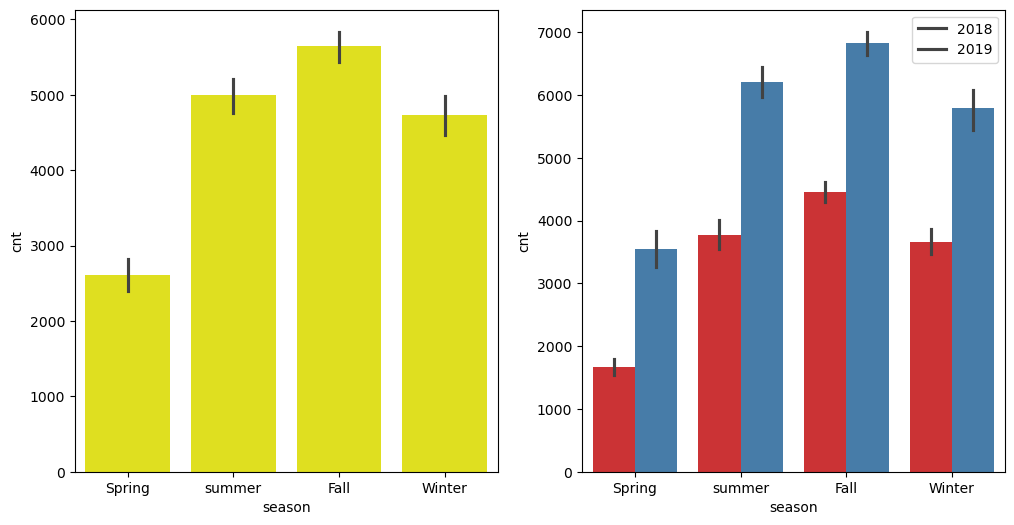

In [352]:
plot_cat_columns('season')

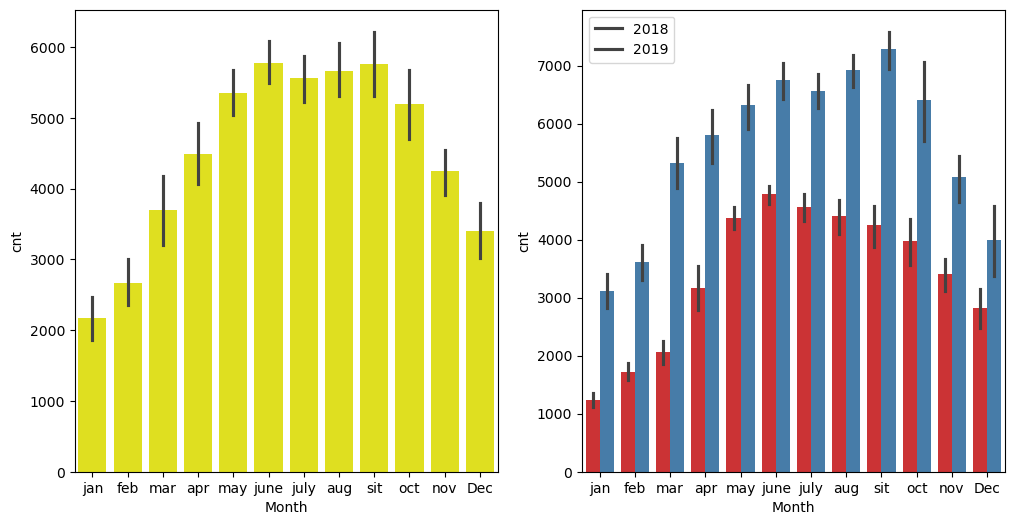

In [353]:
# ploting visualization for monts
plot_cat_columns('Month')

In [354]:
df.columns

Index(['season', 'Year', 'Month', 'Holi Day', 'weekday', 'workingday',
       'weathersit', 'Temperature', 'atemp', 'Humidity', 'windspeed', 'cnt'],
      dtype='object')

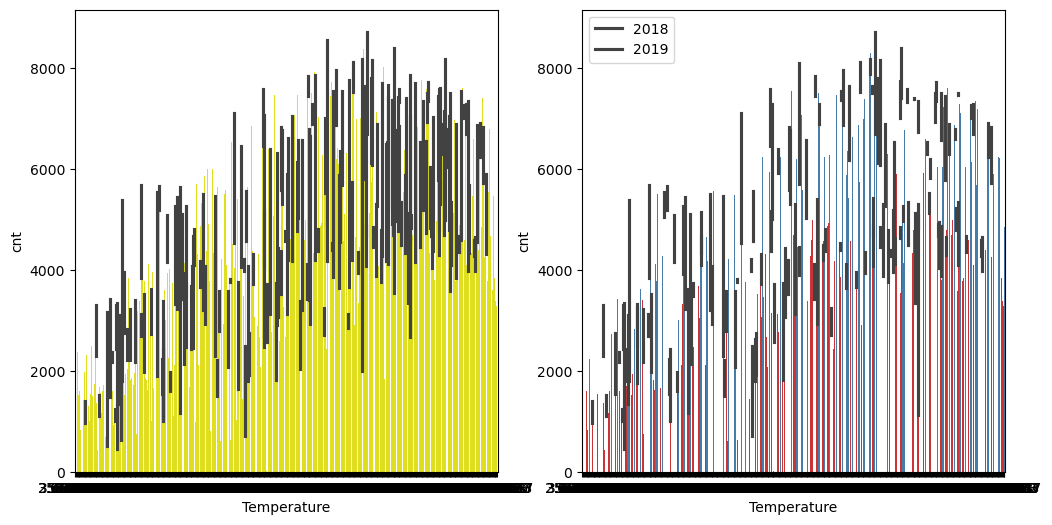

In [355]:
plot_cat_columns("Temperature")

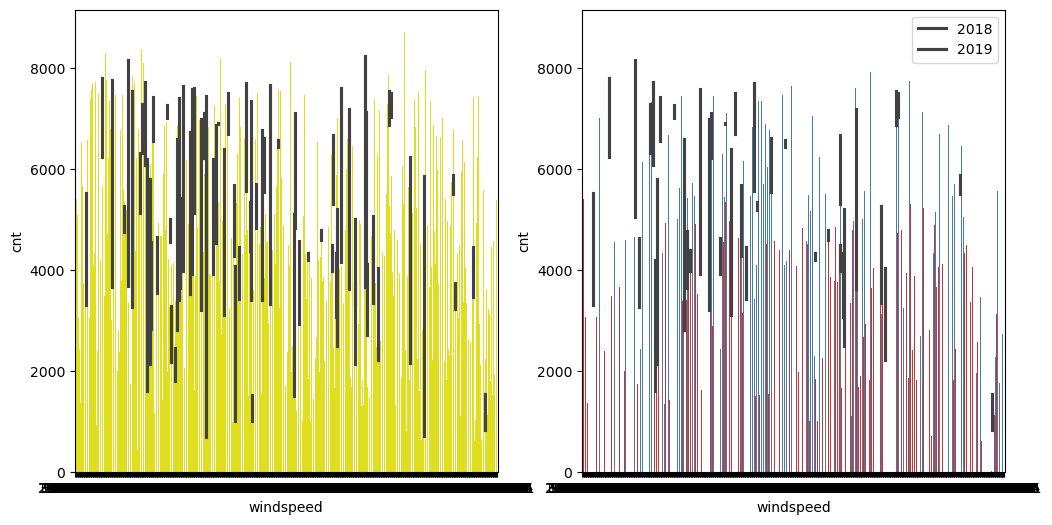

In [356]:
plot_cat_columns('windspeed')

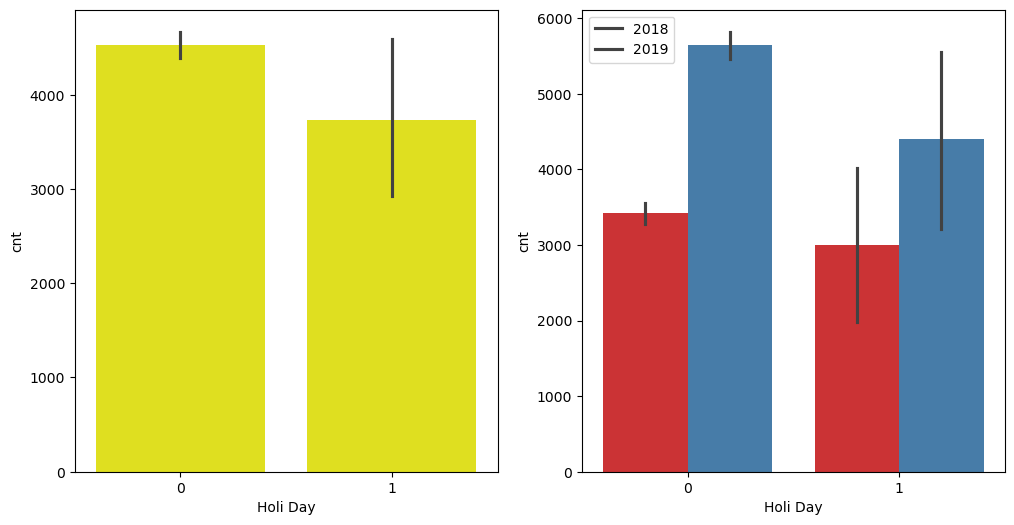

In [357]:
plot_cat_columns("Holi Day")

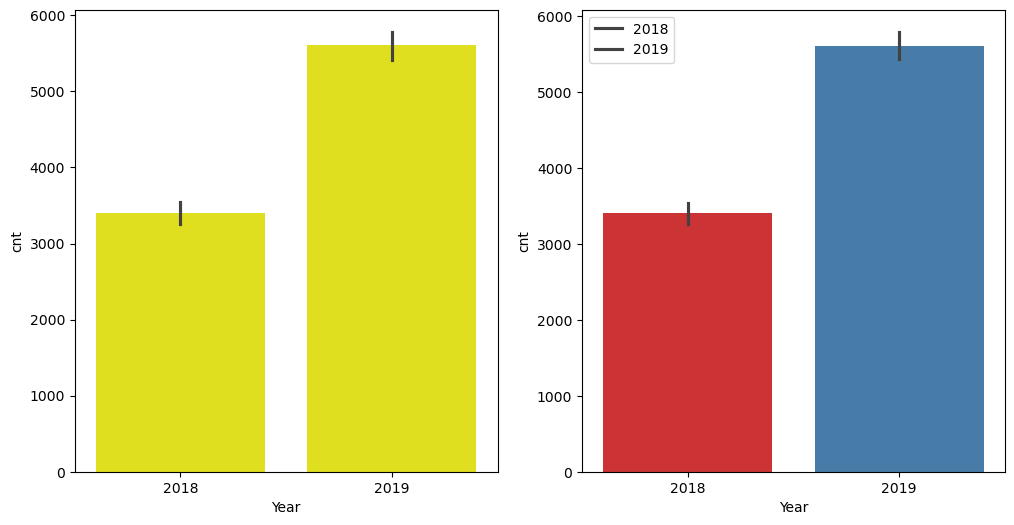

In [358]:
plot_cat_columns("Year")

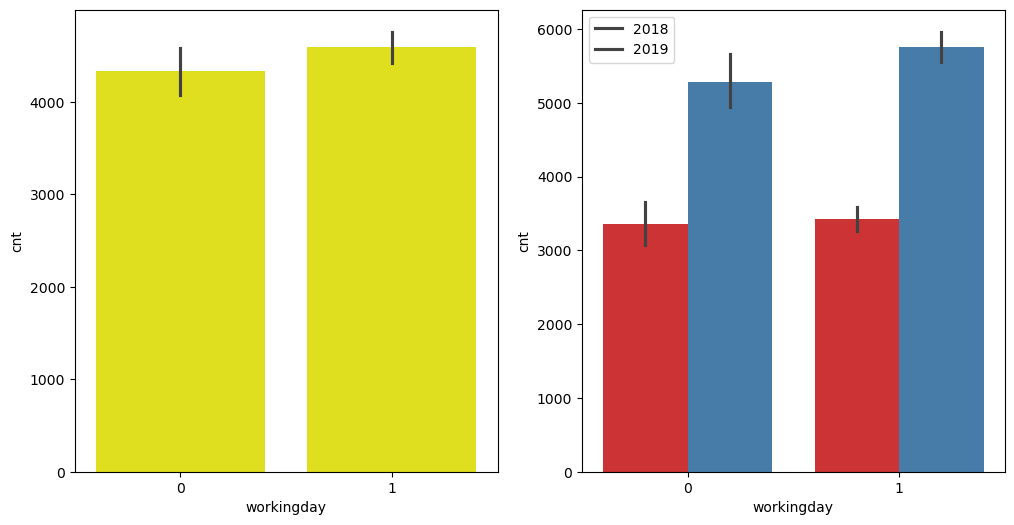

In [359]:
plot_cat_columns("workingday")

In [360]:
# Dumy variable creation for month, weekday, weathersit and season variable:

months_df= pd.get_dummies(df.Month, drop_first=True)
weekdays_df= pd.get_dummies(df.weekday, drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit, drop_first=True)
seasons_df = pd.get_dummies(df.season, drop_first=True)

In [361]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [362]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   Year         730 non-null    int64  
 2   Month        730 non-null    object 
 3   Holi Day     730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   Temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   Humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  apr          730 non-null    bool   
 13  aug          730 non-null    bool   
 14  feb          730 non-null    bool   
 15  jan          730 non-null    bool   
 16  july         730 non-null    bool   
 17  june         730 non-null    bool   
 18  mar          730 non-null    bool   
 19  may     

In [363]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','Month','weekday','weathersit'], axis = 1, inplace = True)

In [364]:
df_new.head()

,Year,Holi Day,workingday,Temperature,atemp,Humidity,windspeed,cnt,apr,aug,...,sat,sun,thu,tue,wed,Misty,clear,Spring,Winter,summer
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,True,False,True,False,False
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,True,False,True,False,False
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,True,True,False,False
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,True,True,False,False
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,True,True,False,False


In [365]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [366]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         730 non-null    int64  
 1   Holi Day     730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   Temperature  730 non-null    float64
 4   atemp        730 non-null    float64
 5   Humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   apr          730 non-null    bool   
 9   aug          730 non-null    bool   
 10  feb          730 non-null    bool   
 11  jan          730 non-null    bool   
 12  july         730 non-null    bool   
 13  june         730 non-null    bool   
 14  mar          730 non-null    bool   
 15  may          730 non-null    bool   
 16  nov          730 non-null    bool   
 17  oct          730 non-null    bool   
 18  sit          730 non-null    bool   
 19  mon     

In [367]:
x = df_new.drop(['cnt'], axis=1)
y = df_new['cnt']

In [368]:
# scale x using either standard/min max/robust

In [369]:
# spliting the dataframe into Train and Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

In [370]:
from sklearn.linear_model import LinearRegression

In [371]:
regr = LinearRegression()

In [372]:
regr.fit(x_train, y_train)

LinearRegression()

In [375]:
y_pred = regr.predict(x_test)

In [376]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [377]:
r2_score(y_test, y_pred)

0.8115759574924345

In [380]:
mean_absolute_error(y_test, y_pred)

566.9532479996747

In [381]:
from sklearn.metrics import root_mean_squared_error

In [382]:
root_mean_squared_error(y_test,y_pred)

775.1603518788437

In [383]:
mean_absolute_error(y_test,y_pred)

566.9532479996747

In [387]:
mean_absolute_percentage_error(y_test,y_pred)

0.1742917353941687